In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource

Loading BokehJS ...

In [2]:
data=pd.read_excel('/Users/rae616188919/Desktop/数据分析/项目资料/项目08电商打折套路解析/双十一淘宝美妆数据.xlsx')
print(data.head())
print(data.columns)
print(data.index)

  update_time           id                           title  price    店名
0  2016-11-14  A2251521828          相宜本草四倍多萃润泽精华保湿霜滋润面霜女补水   79.0  相宜本草
1  2016-11-14  A2251610120       正品相宜本草四倍多萃润泽洁面膏深层清洁滋润补水保湿   29.0  相宜本草
2  2016-11-14  A2251615486  相宜本草红石榴亮白嫩肤水女紧致补水保湿精华爽肤水女秋冬护肤品  108.0  相宜本草
3  2016-11-14  A2252191048      相宜本草红石榴鲜活透亮面贴膜7片补水保湿女化妆品滋润   79.0  相宜本草
4  2016-11-14  A2253094636         相宜本草去死皮膏洁净面部全身温和去角质补水化妆   35.0  相宜本草
Index(['update_time', 'id', 'title', 'price', '店名'], dtype='object')
RangeIndex(start=0, stop=27642, step=1)


In [3]:
#一、整理数据
#删除空值
data.dropna(0,inplace=True)
#按照店名分组
data1=data.groupby('店名').count()
#去重
len_1=len(data1)
m=len(data['id'].unique())
print('产品数: %d' %m)
print('品牌数:%d '%len_1)
data.set_index(['update_time'],inplace=True)

产品数: 3502
品牌数:22 


In [11]:
print(data1.head())

      update_time    id  title  price
店名                                   
SKII          469   469    469    469
佰草集          2265  2265   2265   2265
倩碧           1704  1704   1704   1704
兰芝           1098  1098   1098   1098
兰蔻           1285  1285   1285   1285


In [4]:
#改变index
data['date']=data.index.day
df1=data[['id','title','店名','date']]
#按照id分类，选择最低，最高的date
d1=df1[['id','date']].groupby(by='id').agg(['min','max'])['date']
print(d1.head())
#选择双十一的商品的表格
id_11=data[data['date']==11]['id'].unique()
d2=pd.DataFrame({'id':id_11,'11':True})
#合并两个表，按照id链接
d3=pd.merge(d1,d2,left_index=True,right_on='id',how='left')
d3['11'][d3['11']!=True]=False
print(d3.head())

              min  max
id                    
A10027317366    5   14
A10588608182    5   14
A10847151685    5   14
A12229499633    5   10
A12229615671    5   11
      min  max            id     11
92      5   14  A10027317366   True
93      5   14  A10588608182   True
94      5   14  A10847151685   True
2334    5   10  A12229499633  False
95      5   11  A12229615671   True


/Users/rae616188919/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [6]:
#3.设置分类
#  （1）A类：11.11前后及当天都在售 → 一直在售
#  （2）B类：11.11之后停止销售 → 双十一后停止销售
#  （3）C类：11.11开始销售并当天不停止 → 双十一当天上架并持续在售
#  （4）D类：11.11开始销售且当天停止 → 仅双十一当天有售
#  （6）E类：11.5 - 11.10 → 双十一前停止销售
#  （7）G类：11.11之后开始销售 → 双十一后上架
# 商品销售节奏分类
len0=len(d3)
len1=len(d3[d3['11']==True])
len2=len(d3[d3['11']==False])
print('占比: %.3f %%'  %(len1/len0*100))
d3['type']='待分类'
d3['type'][(d3['min']<11) & (d3['max']>11)]='a'
d3['type'][(d3['min']<11) & (d3['max']==11)]='b'
d3['type'][(d3['min']==11) & (d3['max']>11)]='c'
d3['type'][(d3['min']==11) & (d3['max']==11)]='d'
d3['type'][d3['11']==False]='f'
d3['type'][(d3['max']<11)]='e'
d3['type'][(d3['min']>11)]='g'
#按照type分类计数
result1=d3['type'].value_counts()
print(result1)

占比: 66.676 %


/Users/rae616188919/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/rae616188919/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/rae616188919/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rae616188919/anaconda3/lib/pyt

a    1820
e     841
b     458
f     242
g      84
c      39
d      18
Name: type, dtype: int64


/Users/rae616188919/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rae616188919/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


([<matplotlib.patches.Wedge at 0x123b95198>,
 [Text(3.293680087250887, -0.20413594207534935, 'a'),
  Text(-2.5397475011089092, -2.1070554408014646, 'e'),
  Text(-2.9380333170841904, 1.5026510665165325, 'b'),
  Text(-1.4947385706095906, 2.942066723501015, 'f'),
  Text(-0.5830781871066643, 3.2480794060060183, 'g'),
  Text(-0.22186113204672228, 3.292533619887115, 'c'),
  Text(-0.053284548810931406, 3.2995697836017985, 'd')],
 [Text(2.3954036998188273, -0.1484625033275268, '51.97%'),
  Text(-1.8470890917155705, -1.5324039569465195, '24.01%'),
  Text(-2.1367515033339566, 1.0928371392847511, '13.08%'),
  Text(-1.087082596806975, 2.1396848898189202, '6.91%'),
  Text(-0.4240568633503013, 2.362239568004377, '2.40%'),
  Text(-0.1613535505794344, 2.3945699053724474, '1.11%'),
  Text(-0.03875239913522285, 2.3996871153467625, '0.51%')])

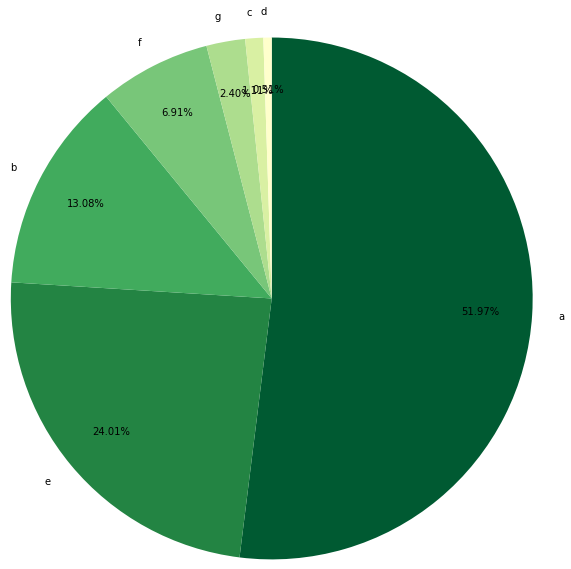

In [8]:
#设置饼图
from bokeh.palettes import brewer
colori=brewer['YlGn'][7]
# 保证长宽相等
plt.axis('equal')
plt.pie(result1,labels=result1.index,autopct='%.2f%%',
       pctdistance=0.8,labeldistance=1.1,startangle=90,
       radius=2,counterclock=False,colors=colori)

In [30]:
#二、没有打折的商品怎么了呢？
# 未参与双十一当天活动的商品，在双十一之后的去向如何？
#   con1 → 暂时下架（F）
#   con2 → 重新上架（E中部分数据，数据中同一个id可能有不同title，“换个马甲重新上架”）
#   con3 → 预售（E中部分数据，预售商品的title中包含“预售”二字），字符串查找特定字符 dataframe.str.contains('预售')
#   con4 → 彻底下架（E中部分数据），可忽略
#没参加活动
d_no=d3[d3['11']==False]
no_count=d_no.index
print('没参加活动：%d' %len(d_no))
print(d_no.head())

没参加活动：1167
      min  max            id     11 type
2334    5   10  A12229499633  False    e
2334    5   14  A12229695732  False    f
2334    5   14  A12454406919  False    f
2334    5   10  A12459717064  False    e
2334    5   10  A12459730213  False    e


In [34]:
#没参加活动的商品和分类表结合
df_not11=d_no[['id','type']]
data_not11=pd.merge(df_not11,data,on='id',how='left')
print(data_not11.head())
#暂时下架的产品：# F类：仅11.11当天停止销售 → 仅双十一当天停止销售
id_con1=d3['id'][d3['type']=='f'].values
print('暂时下架的产品:%i个'%len(id_con1))
#重新上架的商品（E中部分数据，数据中同一个id可能有不同title，“换个马甲重新上架”）
data_con2=data_not11[['id','title','date']].groupby(by=['id','title']).count()
title_count=data_con2.reset_index()['id'].value_counts()
print(title_count.head())
id_con2=title_count[title_count>1].index
print('新上架的商品:%i个'%len(id_con2))
#预售商品（E中部分数据，预售商品的title中包含“预售”二字）
data_con3=data_not11[data_not11['title'].str.contains('预售')]
id_con3=data_con3['id'].value_counts().index
print('预售商品:%i个'%len(id_con3))

             id type                           title  price    店名  date
0  A12229499633    e  【双11来啦】专柜正品相宜本草芯净自然控油洁面两用卸妆乳补水   49.0  相宜本草    10
1  A12229499633    e  【双11来啦】专柜正品相宜本草芯净自然控油洁面两用卸妆乳补水   49.0  相宜本草     9
2  A12229499633    e  【双11来啦】专柜正品相宜本草芯净自然控油洁面两用卸妆乳补水   49.0  相宜本草     8
3  A12229499633    e  【双11来啦】专柜正品相宜本草芯净自然控油洁面两用卸妆乳补水   49.0  相宜本草     7
4  A12229499633    e  【双11来啦】专柜正品相宜本草芯净自然控油洁面两用卸妆乳补水   49.0  相宜本草     6
暂时下架的产品:242个
A41435813637     3
A38622701169     3
A536510937963    3
A530888138469    3
A2254066344      3
Name: id, dtype: int64
新上架的商品:110个
预售商品:453个


In [51]:
#三、真正参与双十一的品牌有哪些？各个品牌参与活动的商品数量分布？
#当日售卖的商品（d）+预售商品
#相加后再去重，去掉预售且当天在售的商品）
d_yes=d3[d3['11']==True]
df_11=d_yes[['id','type']]
data_11=pd.merge(df_11,data,on='id',how='left')
id_11=data_11['id'].unique()
id_sale_final=np.hstack((id_11,id_con3))
result2=pd.DataFrame({'id':id_sale_final})
result2['id'].duplicated()
print("真正参与双十一的品牌%i个" %(len(result2)))

# 得到不同品牌的当天参与活动商品的数量
x1= pd.DataFrame({'id':id_11})
x1_df=pd.merge(x1,data,on='id',how='left')
brand_sale=x1_df.groupby('店名')['id'].count()
print(brand_sale.head())

# 得到不同品牌的预售商品的数量
x2= pd.DataFrame({'id':id_con3})
x2_df=pd.merge(x2,data,on='id',how='left')
brand_ys=x2_df.groupby('店名')['id'].count()
print(brand_ys.head())

result2_data=pd.DataFrame({'当天参与活动商品':brand_sale,'预售商品的数量':brand_ys})
result2_data['参与双十一的商品数量']=result2_data['当天参与活动商品']+result2_data['预售商品的数量']
result2_data.sort_values(by='参与双十一的商品数量',inplace=True,ascending=False)
result2_data

真正参与双十一的品牌2788个
店名
SKII     342
佰草集     1840
倩碧      1304
兰芝       817
兰蔻       917
Name: id, dtype: int64
店名
SKII     90
佰草集     182
倩碧      299
兰芝       24
兰蔻      202
Name: id, dtype: int64


,当天参与活动商品,预售商品的数量,参与双十一的商品数量
店名,,,
悦诗风吟,2709,60,2769
佰草集,1840,182,2022
欧莱雅,1644,115,1759
雅诗兰黛,1392,239,1631
倩碧,1304,299,1603
妮维雅,1189,78,1267
美加净,1217,6,1223
娇兰,805,365,1170
兰蔻,917,202,1119


In [55]:
# 制作堆叠图查看各个品牌参与双十一活动的商品数量分布
from bokeh.models import HoverTool
from bokeh.core.properties import value

brand=result2_data.index.tolist()
type1=result2_data.columns.tolist()[:2]
colors = ["#718dbf" ,"#e84d60"]
result2_data.index.name='店名'
# 创建数据
source=ColumnDataSource(data=result2_data)
# 设置标签显示内容
hover=HoverTool(tooltips=[('品牌','@店名'),
                          ('预售','@预售商品的数量'),
                         ('双十一当天的活动','@当天参与活动商品'),
                         ('总活动数','@参与双十一的商品数量')])
# 构建绘图空间
p=figure(x_range=brand,plot_width=900,plot_height=350,
         title='各个品牌参与双十一活动的数量',tools=[hover,'reset,xwheel_zoom,pan,crosshair'])
p.vbar_stack(type1,x='店名',source=source,width=0.9,color=colors,
            alpha=0.8,legend=[value(x) for x in type1],
            muted_color='black',muted_alpha=0.2)
p.xgrid.grid_line_color=None
p.axis.minor_tick_line_color=None
p.outline_line_color=None
p.legend.location='top_right'
p.legend.orientation='horizontal'
p.legend.click_policy='mute'
show(p)

In [ ]:
'''
2、哪些商品真的在打折呢？
要求：
① 针对每个商品，评估其打折的情况
② 针对在打折的商品，其折扣率是多少
   * 用bokeh绘制折线图：x轴为折扣率，y轴为商品数量
③ 按照品牌分析，不同品牌的打折力度
   * 用bokeh绘制浮动散点图，y坐标为品牌类型，x坐标为折扣力度
提示：
① 打折情况评估方法：
   真打折：商品的价格在10天内有波动、双11价格为10天内最低价、不存在涨价现象
   不打折：商品价格无变化
② 针对每个商品做price字段的value值统计，查看价格是否有波动，可以先用pd.cut将date分为不同周期：'双十一前','双十一当天','双十一后'，得到period字段
   data[['id','price','date']].groupby(['id','price']).min()
   针对统计出来的结果，如果按照id和price分组仍只有一个唯一值，则说明价格未变，没打折；否则为打折
③ 折扣率 = 双十一当天价格 / 双十一之前价格
④ 作图过程中，清除掉折扣率大于95%的数据

'''

In [61]:
#2、哪些商品真的在打折呢？
data2=data[['id','title','店名','date','price']]
#将日期分组，双十一之前，双十一，双十一之后
data2['period']=pd.cut(data['date'],[4,10,11,14],labels=['pre_11','on_11','after_11'])
# 针对每个商品每个阶段做price字段的value值统计，查看价格是否有波动
price=data2[['id','price','period']].groupby(['id','price']).min()
price.reset_index(inplace=True)
id_count=price['id'].value_counts()
id_type1=id_count[id_count==1].index
id_type2=id_count[id_count!=1].index
n1=len(id_type1)
n2=len(id_type2)
print("真的在打折的商品：%i个" %n1)
print('真的在打折的商品比例：%.2f%%' %(100*n1/(n1+n2)))

/Users/rae616188919/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


真的在打折的商品：2636个
真的在打折的商品比例：0.75%


In [62]:
#折扣率是多少
result3=data2[['id','店名','price','period']].groupby(['id','period']).min()
result3.reset_index(inplace=True)
# 筛选出商品双十一当天及双十一之前的价格
data_before11=result3[result3['period']=='pre_11']
data_at11=result3[result3['period']=='on_11']
data_after11=result3[result3['period']=='after_11']
#合并表格
data_new=pd.merge(data_before11,data_at11,on=['id','店名'])
#计算折扣率
data_new['zkl']=data_new['price_y']/data_new['price_x']
print(data_new.head())

             id period_x    店名  price_x period_y  price_y       zkl
0  A10027317366   pre_11  相宜本草    258.0    on_11   159.00  0.616279
1  A10588608182   pre_11   欧莱雅    249.0    on_11   189.00  0.759036
2  A10847151685   pre_11   佰草集    240.0    on_11   125.99  0.524958
3  A12229615671   pre_11  相宜本草     79.0    on_11    39.50  0.500000
4  A12454514788   pre_11   美宝莲     89.0    on_11    79.00  0.887640


In [80]:
#去重
bokeh_data=data_new[['id','zkl']].dropna()
#分箱子 
bokeh_data['zkl_range']=pd.cut(bokeh_data['zkl'],bins=np.linspace(0,1,21))
# 这里去掉折扣率在0.95-1之间的数据，该区间内数据zkl大部分为1，不打折
bokeh_data2=bokeh_data.groupby('zkl_range').count().iloc[:-1]
bokeh_data2['zkl_pre']=bokeh_data2['zkl']/bokeh_data2['zkl'].sum()
bokeh_data2.sort_values(by='zkl_pre',inplace=True,ascending=False)
print(bokeh_data2)
#可见30%商品折扣在0.85-0.9之间，20.8%商品折扣在0.45-0.5之间

              id  zkl   zkl_pre
zkl_range                      
(0.85, 0.9]  239  239  0.304071
(0.45, 0.5]  164  164  0.208651
(0.8, 0.85]   72   72  0.091603
(0.65, 0.7]   64   64  0.081425
(0.7, 0.75]   63   63  0.080153
(0.75, 0.8]   55   55  0.069975
(0.55, 0.6]   38   38  0.048346
(0.6, 0.65]   23   23  0.029262
(0.9, 0.95]   23   23  0.029262
(0.4, 0.45]   12   12  0.015267
(0.5, 0.55]    9    9  0.011450
(0.35, 0.4]    8    8  0.010178
(0.15, 0.2]    5    5  0.006361
(0.3, 0.35]    4    4  0.005089
(0.1, 0.15]    4    4  0.005089
(0.2, 0.25]    2    2  0.002545
(0.05, 0.1]    1    1  0.001272
(0.25, 0.3]    0    0  0.000000
(0.0, 0.05]    0    0  0.000000


In [69]:
lst_brand1=bokeh_data2.index.astype(np.str)
lst_brand=lst_brand1.tolist()
print(lst_brand)

['(0.0, 0.05]', '(0.05, 0.1]', '(0.1, 0.15]', '(0.15, 0.2]', '(0.2, 0.25]', '(0.25, 0.3]', '(0.3, 0.35]', '(0.35, 0.4]', '(0.4, 0.45]', '(0.45, 0.5]', '(0.5, 0.55]', '(0.55, 0.6]', '(0.6, 0.65]', '(0.65, 0.7]', '(0.7, 0.75]', '(0.75, 0.8]', '(0.8, 0.85]', '(0.85, 0.9]', '(0.9, 0.95]']


In [82]:
from bokeh.models import HoverTool
from bokeh.core.properties import value
# 创建数据
source=ColumnDataSource(data=bokeh_data2)
hover1=HoverTool(tooltips=[('折扣率','@zkl')])
p1 = figure(plot_width=900,plot_height=350,title="商品折扣率统计",
            tools=[hover1,'reset,xwheel_zoom,pan,crosshair'])
p1.line(x='zkl_range',y='zkl_pre',source=source,
      line_width=2,line_alpha=0.8,line_color='black',line_dash=[10,4])
p1.circle(x='zkl_range',y='zkl_pre',source=source,size=8,color='red',alpha=0.8)
p1.xgrid.grid_line_color=None
p1.axis.minor_tick_line_color=None
p1.outline_line_color=None
show(p1)

TypeError: Object of type Interval is not JSON serializable

In [78]:
# 按照品牌分析，不同品牌的打折力度
# 用bokeh绘制浮动散点图，y坐标为品牌类型，x坐标为折扣力度

from bokeh.transform import jitter

brands = data_new['店名'].dropna().unique().tolist()
# 得到y坐标

bokeh_data = data_new[['id','zkl','店名']].dropna()
bokeh_data = bokeh_data[bokeh_data['zkl'] < 0.95]
source = ColumnDataSource(data = bokeh_data)
# 创建数据

hover = HoverTool(tooltips=[("折扣率", "@zkl")])  # 设置标签显示内容

p = figure(plot_width=800, plot_height=600,y_range=brands,title="不同品牌折扣率情况",
          tools=[hover,'reset,ywheel_zoom,pan,crosshair'])

p.circle(x='zkl', 
         y=jitter('店名', width=0.6, range=p.y_range),
         source=source, alpha=0.3)
# jitter参数 → 'day'：第一参数，这里指y的值，width：间隔宽度比例，range：分类范围对象，这里和y轴的分类一致

p.ygrid.grid_line_color = None
# 设置其他参数

show(p)

In [88]:
#五、商家营销套路挖掘？
# 解析出不同品牌的参与打折商品比例及折扣力度，并做散点图，总结打折套路
# 删除未打折数据
data_zk = data_new[data_new['zkl']<0.95]
# 筛选出不同品牌的折扣率
result4_zk=data_zk.groupby('店名')['zkl'].mean()
n_dz=data_zk['店名'].value_counts()
n_zs=data_new['店名'].value_counts()
result4_dz=pd.DataFrame({'折扣数':n_dz,'商品总数':n_zs})
result4_dz['比例']=result4_dz['折扣数']/result4_dz['商品总数']
result4_dz.dropna(inplace=True)

# 筛选出品牌参加双11活动的商品总数
result4_sum=result2_data.copy()
result4_data1=pd.merge(pd.DataFrame(result4_zk),result4_dz,left_index=True,right_index = True, how = 'inner')
result4_data = pd.merge(result4_data1,result4_sum,left_index = True, right_index = True, how = 'inner')
print(result4_data.head())

          zkl    折扣数  商品总数        比例  当天参与活动商品  预售商品的数量  参与双十一的商品数量
店名                                                                 
佰草集  0.576060  186.0   192  0.968750      1840      182        2022
兰芝   0.440332    3.0    97  0.030928       817       24         841
兰蔻   0.761905    1.0   104  0.009615       917      202        1119
妮维雅  0.888144   90.0   127  0.708661      1189       78        1267
娇兰   0.798122    1.0    88  0.011364       805      365        1170


In [91]:
# 用bokeh绘制散点图，x轴为参与打折商品比例，y轴为折扣力度，点的大小代表该品牌参加双11活动的商品总数

from bokeh.models.annotations import Span            # 导入Span模块
from bokeh.models.annotations import Label           # 导入Label模块
from bokeh.models.annotations import BoxAnnotation   # 导入BoxAnnotation模块
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  
mpl.rcParams['axes.unicode_minus'] = False 

bokeh_data = result4_data[['zkl','参与双十一的商品数量','比例']]
bokeh_data.columns = ['zkl','amount','pre']
bokeh_data['size'] = bokeh_data['amount'] * 0.03
source = ColumnDataSource(bokeh_data)
# 创建ColumnDataSource数据

x_mean = bokeh_data['pre'].mean()
y_mean = bokeh_data['zkl'].mean()

hover = HoverTool(tooltips=[("品牌", "@index"),
                            ("折扣率", "@zkl"),
                            ("商品总数", "@amount"),
                            ("参与打折商品比例", "@pre"),
                           ])  # 设置标签显示内容
p = figure(plot_width=600, plot_height=600,
                title="各个品牌打折套路解析" , 
                tools=[hover,'box_select,reset,wheel_zoom,pan,crosshair']) 
# 构建绘图空间

p.circle_x(x = 'pre',y = 'zkl',source = source,size = 'size',
           fill_color = 'red',line_color = 'black',fill_alpha = 0.6,line_dash = [8,3])
p.ygrid.grid_line_dash = [6, 4]
p.xgrid.grid_line_dash = [6, 4]
# 散点图

x = Span(location=x_mean, dimension='height', line_color='green',line_alpha = 0.7, line_width=1.5, line_dash = [6,4])
y = Span(location=y_mean, dimension='width', line_color='green',line_alpha = 0.7, line_width=1.5, line_dash = [6,4])
p.add_layout(x)
p.add_layout(y)
# 绘制辅助线

bg1 = BoxAnnotation(bottom=y_mean, right=x_mean,fill_alpha=0.1, fill_color='olive')
label1 = Label(x=0.1, y=0.55,text="少量大打折",text_font_size="10pt" )
p.add_layout(bg1)
p.add_layout(label1)
# 绘制第一象限

bg2 = BoxAnnotation(bottom=y_mean, left=x_mean,fill_alpha=0.1, fill_color='firebrick')
label2 = Label(x=0.7, y=0.55,text="大量大打折",text_font_size="10pt" )
p.add_layout(bg2)
p.add_layout(label2)
# 绘制第二象限

bg3 = BoxAnnotation(top=y_mean, right=x_mean,fill_alpha=0.1, fill_color='firebrick')
label3 = Label(x=0.1, y=0.80,text="少量少打折",text_font_size="10pt" )
p.add_layout(bg3)
p.add_layout(label3)
# 绘制第三象限

bg4 = BoxAnnotation(top=y_mean, left=x_mean,fill_alpha=0.1, fill_color='olive')
label4 = Label(x=0.7, y=0.80,text="少量大打折",text_font_size="10pt" )
p.add_layout(bg4)
p.add_layout(label4)
# 绘制第四象限

show(p)

'''
结论：
少量少打折：包括雅诗兰黛、娇兰、兰蔻、薇姿、玉兰油等共5个品牌。
少量大打折：包括悦诗风吟、兰芝、欧珀莱等3个品牌。该类品牌的打折商品较少，但折扣力度较大。
大量小打折：包括妮维雅、美宝莲、蜜丝佛陀等3个品牌。该类型有半数以上的商品都参与了打折活动，但折扣力度并不大。
大量大打折：包括相宜本草、佰草集、自然堂等三大国产品牌。这些品牌不仅有90%以上的商品参与了折扣活动，而且折扣力度很大。
'''

/Users/rae616188919/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


'\n结论：\n少量少打折：包括雅诗兰黛、娇兰、兰蔻、薇姿、玉兰油等共5个品牌。\n少量大打折：包括悦诗风吟、兰芝、欧珀莱等3个品牌。该类品牌的打折商品较少，但折扣力度较大。\n大量小打折：包括妮维雅、美宝莲、蜜丝佛陀等3个品牌。该类型有半数以上的商品都参与了打折活动，但折扣力度并不大。\n大量大打折：包括相宜本草、佰草集、自然堂等三大国产品牌。这些品牌不仅有90%以上的商品参与了折扣活动，而且折扣力度很大。\n'